In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr
import statsmodels.api as sm

# Specify the URL of the dataset
url = "https://raw.githubusercontent.com/AAI-500-Team/aai_500_dataset/main/Energy_efficiency_data.csv"

# Use pandas to read the CSV file from the URL into a DataFrame
df = pd.read_csv(url)

## Introduction

In [3]:
# use the describe method to find descriptive statistics (including the 5-summary stats)
df.describe()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [4]:
rows, columns = df.shape
print(f"Number of rows: {rows}, Number of columns: {columns}")

Number of rows: 1296, Number of columns: 10


We are starting with the dataset containing **1296** original records.

In the next section we will perform data cleaning and preparation, to remove any missing or incomplete values.

## Data Cleaning / Preparation

Let's inspect any missing, incomplete data.

In [5]:
missing_records = df[df.isna().any(axis=1)]
print(f"Number of missing records: {len(missing_records)}")

Number of missing records: 528


We found **528** missing records, possibly due to empty rows in the original **xlsx** spreadsheet.

Let's look further into the available data.

In [6]:
df.head(10)

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2.0,0.0,0.0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3.0,0.0,0.0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4.0,0.0,0.0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5.0,0.0,0.0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2.0,0.0,0.0,20.84,28.28
5,0.90,563.5,318.5,122.50,7.0,3.0,0.0,0.0,21.46,25.38
6,0.90,563.5,318.5,122.50,7.0,4.0,0.0,0.0,20.71,25.16
7,0.90,563.5,318.5,122.50,7.0,5.0,0.0,0.0,19.68,29.60
8,0.86,588.0,294.0,147.00,7.0,2.0,0.0,0.0,19.50,27.30
9,0.86,588.0,294.0,147.00,7.0,3.0,0.0,0.0,19.95,21.97


Looking at the first 10 records in the dataset, we observe that there are no missing values. However, we observe, that
2 column **Glazing Area**, and **Glazing Area Distribution** have the value of **0.0** for all first 10 records.

Let's confirm further that there are row that have values greater than **0.0**

In [7]:
glazing_area_greater_that_zero = df[df['Glazing Area'] > 0]

glazing_area_greater_that_zero.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
48,0.98,514.5,294.0,110.25,7.0,2.0,0.1,1.0,24.58,26.47
49,0.98,514.5,294.0,110.25,7.0,3.0,0.1,1.0,24.63,26.37
50,0.98,514.5,294.0,110.25,7.0,4.0,0.1,1.0,24.63,26.44
51,0.98,514.5,294.0,110.25,7.0,5.0,0.1,1.0,24.59,26.29
52,0.90,563.5,318.5,122.50,7.0,2.0,0.1,1.0,29.03,32.92


There are in fact, rows with glazing area greater than **0.0**, so we assume the data is valid.

However for this research we what exlude buildings with no glazing area, and will do that in our data clean up.

Thus for the data cleaning and preparation we will remove all empty rows and rows containg glazing area of **0.0**.

In [8]:
# creating function to filter out a specific rows in the data frame.
def data_filter(df):
    """ removes specific rows from the data set """
    filtered_df = df.dropna()

    filtered_df = filtered_df[filtered_df['Glazing Area'] != 0]

    return filtered_df

sample_df = data_filter(df)
sample_df.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
48,0.98,514.5,294.0,110.25,7.0,2.0,0.1,1.0,24.58,26.47
49,0.98,514.5,294.0,110.25,7.0,3.0,0.1,1.0,24.63,26.37
50,0.98,514.5,294.0,110.25,7.0,4.0,0.1,1.0,24.63,26.44
51,0.98,514.5,294.0,110.25,7.0,5.0,0.1,1.0,24.59,26.29
52,0.90,563.5,318.5,122.50,7.0,2.0,0.1,1.0,29.03,32.92


In [9]:
print(f"Number of rows after data cleaning: {len(sample_df)}")

Number of rows after data cleaning: 720


The data clean up resulted in **720** final records that are ready to use.

## Exploratory Data Analysis

In [10]:
# Function to create a histogram
def create_histogram(df, column_name, bins=20):
    plt.figure(figsize=(8, 6))
    plt.hist(df[column_name], bins=bins)
    plt.title(f'Histogram of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.show()


# Function to create a box plot
def create_boxplot(df, column_name):
    plt.figure(figsize=(8, 6))
    plt.boxplot(df[column_name])
    plt.title(f'Box Plot of {column_name}')
    plt.ylabel(column_name)
    plt.show()


In [11]:
sample_df.describe()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
count,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.00000,720.000000,720.000000,720.000000
mean,0.764167,671.708333,318.500000,176.604167,5.250000,3.500000,0.25000,3.000000,22.841917,24.913194
std,0.105782,88.089944,43.628378,45.167913,1.751217,1.118811,0.12256,1.415197,10.011346,9.514344
min,0.620000,514.500000,245.000000,110.250000,3.500000,2.000000,0.10000,1.000000,10.070000,13.200000
25%,0.682500,606.375000,294.000000,140.875000,3.500000,2.750000,0.10000,2.000000,13.170000,15.777500
50%,0.750000,673.750000,318.500000,183.750000,5.250000,3.500000,0.25000,3.000000,21.050000,23.670000
75%,0.830000,741.125000,343.000000,220.500000,7.000000,4.250000,0.40000,4.000000,32.135000,33.482500
max,0.980000,808.500000,416.500000,220.500000,7.000000,5.000000,0.40000,5.000000,43.100000,48.030000










We want to focus on the **Heating Load** result variable.

First, we want to understand what is the distribution of the **Heating Load** in our dataset, and what are the good target values for an efficient construction.

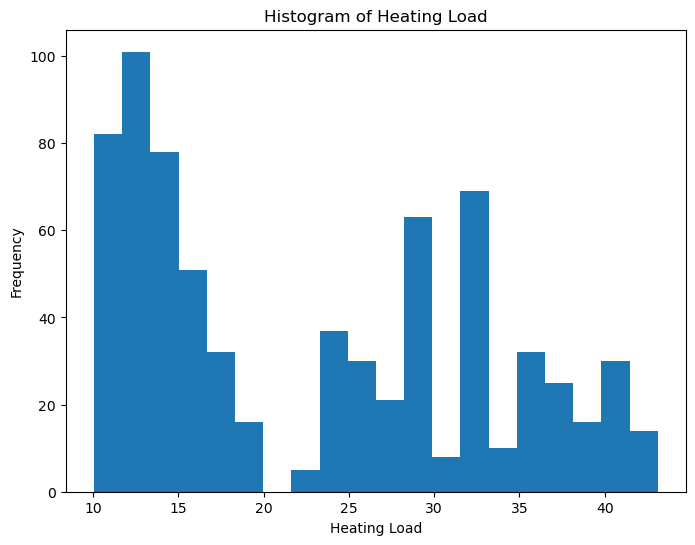

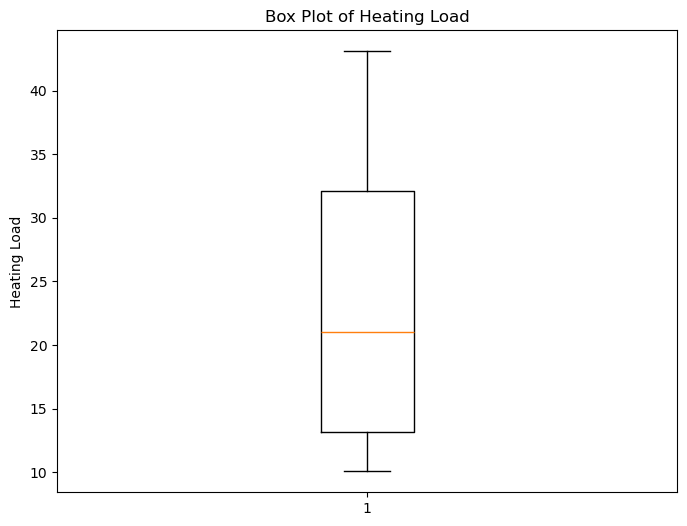

The median Heating Load is 21.05


In [12]:
# Create a histogram
create_histogram(sample_df, 'Heating Load')
create_boxplot(sample_df, 'Heating Load')

print(f"The median Heating Load is {sample_df['Heating Load'].median():.2f}")

For the energy efficient construction, we want to focus on the **Heating Load** below the median value of **21.05**.

Next, we want to indetify what are the features that are most likely to influence the **Heating Load**, so that we can focus on them.

In [13]:
# analyze correlations between columns
correlation_matrix = sample_df.corr()

print(correlation_matrix)

                           Relative Compactness  Surface Area     Wall Area  \
Relative Compactness               1.000000e+00 -9.919015e-01 -2.037817e-01   
Surface Area                      -9.919015e-01  1.000000e+00  1.955016e-01   
Wall Area                         -2.037817e-01  1.955016e-01  1.000000e+00   
Roof Area                         -8.688234e-01  8.807195e-01 -2.923165e-01   
Overall Height                     8.277473e-01 -8.581477e-01  2.809757e-01   
Orientation                        5.023116e-17 -3.970757e-17 -3.320315e-17   
Glazing Area                      -3.443559e-15  3.190455e-15  4.687452e-16   
Glazing Area Distribution          6.446626e-17  1.369815e-15 -1.747826e-16   
Heating Load                       6.410996e-01 -6.772660e-01  4.643809e-01   
Cooling Load                       6.441175e-01 -6.827302e-01  4.292985e-01   

                              Roof Area  Overall Height   Orientation  \
Relative Compactness      -8.688234e-01    8.277473e-01  

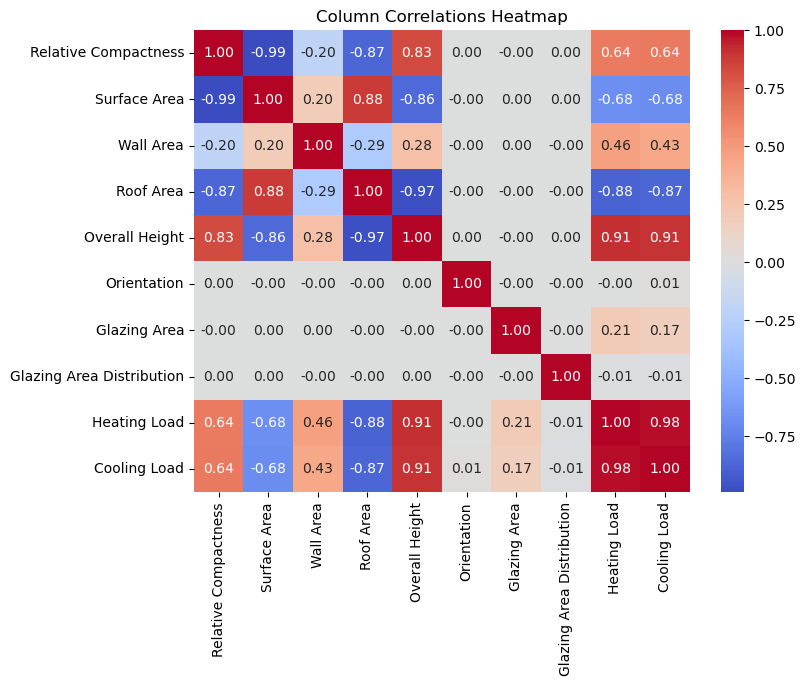

In [14]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Column Correlations Heatmap')
plt.show()

Looking at the reulst of correlations between the Heating Load and other columns, we can identify the features that are most likely to influence the Heating Load:


*  Overall Height  
*  Roof Area
*  Surface Area
*  Relative Compactness

For this research we want to focus on the **Overall Height** and **Relative Compactness**, since we find those features easily accessible to the constructions companies during the archtecture and building process.  
We want to futher explore these relationship, and create predictions based on our findings.


In [15]:
# TODO add Hypothesis Testing
# I.e. prove that there is effect of roof area and overall height on the Heating Load


height = sample_df['Overall Height']
heat_load = sample_df['Heating Load']

# Calculate the Pearson correlation coefficient and p-value
correlation, p_value = pearsonr(height, heat_load)

print(f"Pearson Correlation Coefficient: {correlation}")
print(f"P-value: {p_value}")

# Interpret the results
alpha = 0.05  # significance level
if p_value < alpha:
    print("There is a statistically significant linear relationship between 'Overall Height' and 'Heating Load'.")
else:
    print("There is no statistically significant linear relationship between 'Overall Height' and 'Heating Load'.")


Pearson Correlation Coefficient: 0.9116191406291019
P-value: 1.9031964872758803e-279
There is a statistically significant linear relationship between 'Overall Height' and 'Heating Load'.


In [16]:
height = sample_df['Relative Compactness']
heat_load = sample_df['Heating Load']

# Calculate the Pearson correlation coefficient and p-value
correlation, p_value = pearsonr(height, heat_load)

print(f"Pearson Correlation Coefficient: {correlation}")
print(f"P-value: {p_value}")

# Interpret the results
alpha = 0.05  # significance level
if p_value < alpha:
    print("There is a statistically significant linear relationship between 'Relative Compactness' and 'Heating Load'.")
else:
    print("There is no statistically significant linear relationship between 'Relative Compactness' and 'Heating Load'.")

Pearson Correlation Coefficient: 0.6410996100813607
P-value: 1.364665389737359e-84
There is a statistically significant linear relationship between 'Relative Compactness' and 'Heating Load'.


Now, that we saw the there is an effect of the Roof Area and Overall Height on the Heating Load, we will intodcue a *energy efficiency score* metric to

Our goal is too minimize the the ineficient constructions, i.e. small buildings with large heating load.

Keep in mind that this is a simplified metric, and real-world energy efficiency assessments are much more complex. One can assume, that factors such as insulation, window quality, HVAC system efficiency, and renewable energy sources play significant roles in a building's overall energy efficiency. For the purpose of this research we omit those metrics.



## Model Selection



In [17]:

X = sample_df[['Relative Compactness', 'Overall Height']]
X = sm.add_constant(X)  # Adds a constant term to the predictor
y = sample_df['Heating Load']

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Heating Load   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     2441.
Date:                Sat, 14 Oct 2023   Prob (F-statistic):          9.62e-321
Time:                        18:46:42   Log-Likelihood:                -1939.9
No. Observations:                 720   AIC:                             3886.
Df Residuals:                     717   BIC:                             3899.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   12.5962 